# Exploratory Data Analysis

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import os

In [5]:
path = "data\\datasets\\"

In [6]:
df = pd.read_csv(path + "train.csv")

df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


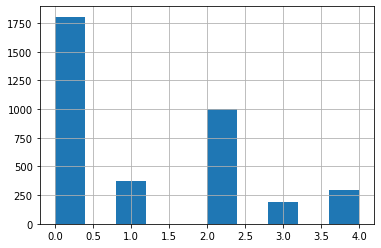

In [8]:
df["diagnosis"].hist();

In [9]:
df["diagnosis"].value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

# Get Train Images

In [11]:
files = os.listdir(path + "train_images")

In [16]:
img_list = []

for i in files[0:20]:
    image = cv2.imread(path + "train_images\\" + i)
    image = cv2.resize(src=image, dsize=(400,400))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_list.append(image)
    
len(img_list)

20

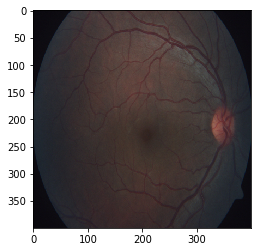

In [18]:
plt.imshow(img_list[6]);

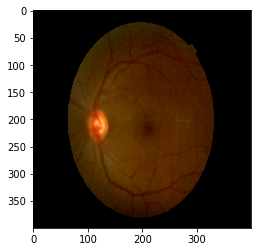

In [19]:
plt.imshow(img_list[4]);

In [20]:
img_list[4].shape

(400, 400, 3)

# Morphological Operations


1- THRESHOLD
 * Threshold works with GRAY Images

2- GAUSSIAN BLUR

3- FIND CONTOURS
 * cv2.RETR_EXTERNAL retrieves only the extreme outer contours of image
 
4- GET COORDINATES

5- CROP IMAGES

6- RESIZE IMAGES 
 * When the images are cropped, their sizes are changed. Therefore we need to rize them again
 
7- CLAHE - Contrast-Limited Adaptive Histogram Equalization 
 * To applt CLAHE, we need to convert color from RGB to LAB => cv2.COLOR_RGB2LAB

(400, 400)

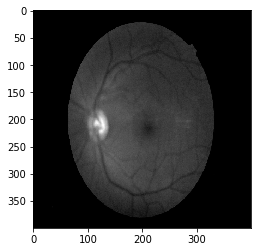

In [28]:
img = cv2.cvtColor(img_list[4].copy(), cv2.COLOR_RGB2GRAY)
plt.imshow(img, cmap='gray');
img.shape

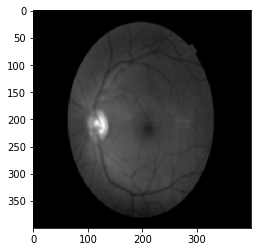

In [36]:
blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)
plt.imshow(blur, cmap='gray');

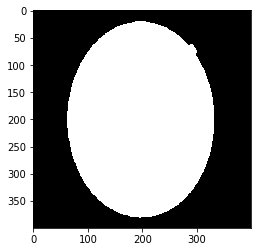

In [38]:
thres = cv2.threshold(blur,10 ,255, cv2.THRESH_BINARY)[1]
plt.imshow(thres, cmap='gray');

In [42]:
contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]

contour

array([[[188,  21]],

       [[187,  22]],

       [[181,  22]],

       [[180,  23]],

       [[177,  23]],

       [[176,  24]],

       [[173,  24]],

       [[172,  25]],

       [[169,  25]],

       [[168,  26]],

       [[166,  26]],

       [[165,  27]],

       [[163,  27]],

       [[162,  28]],

       [[160,  28]],

       [[159,  29]],

       [[158,  29]],

       [[157,  30]],

       [[155,  30]],

       [[154,  31]],

       [[153,  31]],

       [[152,  32]],

       [[151,  32]],

       [[150,  33]],

       [[149,  33]],

       [[148,  34]],

       [[147,  34]],

       [[146,  35]],

       [[145,  35]],

       [[143,  37]],

       [[142,  37]],

       [[141,  38]],

       [[140,  38]],

       [[138,  40]],

       [[137,  40]],

       [[135,  42]],

       [[134,  42]],

       [[131,  45]],

       [[130,  45]],

       [[126,  49]],

       [[125,  49]],

       [[109,  65]],

       [[109,  66]],

       [[104,  71]],

       [[104,  72]],

       [[1

In [43]:
contour.shape

(452, 1, 2)

In [44]:
contour = contour[:,0,:]
contour.shape

(452, 2)

In [45]:
contour

array([[188,  21],
       [187,  22],
       [181,  22],
       [180,  23],
       [177,  23],
       [176,  24],
       [173,  24],
       [172,  25],
       [169,  25],
       [168,  26],
       [166,  26],
       [165,  27],
       [163,  27],
       [162,  28],
       [160,  28],
       [159,  29],
       [158,  29],
       [157,  30],
       [155,  30],
       [154,  31],
       [153,  31],
       [152,  32],
       [151,  32],
       [150,  33],
       [149,  33],
       [148,  34],
       [147,  34],
       [146,  35],
       [145,  35],
       [143,  37],
       [142,  37],
       [141,  38],
       [140,  38],
       [138,  40],
       [137,  40],
       [135,  42],
       [134,  42],
       [131,  45],
       [130,  45],
       [126,  49],
       [125,  49],
       [109,  65],
       [109,  66],
       [104,  71],
       [104,  72],
       [101,  75],
       [101,  76],
       [ 99,  78],
       [ 99,  79],
       [ 97,  81],
       [ 97,  82],
       [ 95,  84],
       [ 95,

In [46]:
contour[:,0].argmax() # max. index

335

In [48]:
contour[335] # max value

array([332, 218], dtype=int32)

In [47]:
contour[:,0].argmin() # min index

111

In [49]:
contour[111] # min value

array([ 63, 185], dtype=int32)

In [52]:
left = tuple(contour[contour[:,0].argmin()])
right = tuple(contour[contour[:,0].argmax()])
top = tuple(contour[contour[:,1].argmin()])
bottom = tuple(contour[contour[:,1].argmax()])

print(f"left: {left}\nright: {right}\ntop: {top}\nbottom: {bottom}\n")

left: (63, 185)
right: (332, 218)
top: (188, 21)
bottom: (194, 380)



In [53]:
x1 = left[0]
y1 = top[1]
x2 = right[0]
y2 = bottom[1]

print(f"left[0]: {x1}\ntop[1]: {y1}\nright[0]: {x2}\nbottom[1]: {y2}\n")

left[0]: 63
top[1]: 21
right[0]: 332
bottom[1]: 380



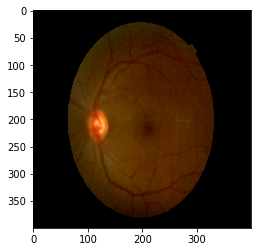

In [54]:
orj_img = img_list[4].copy()
plt.imshow(orj_img);

shape:  (359, 269, 3)


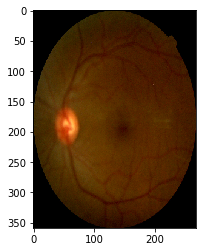

In [56]:
crop_img = orj_img[y1:y2, x1:x2]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


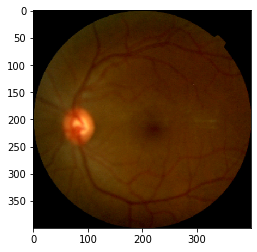

In [57]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

### Crop Images Again to Destroy Black Area

In [59]:
x = int(x2-x1)*4//100
y = int(y2-y1)*5//100

print(x,y)

10 17


shape:  (325, 249, 3)


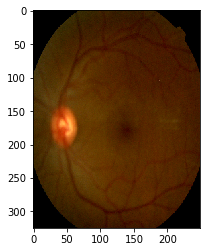

In [60]:
crop_img = orj_img[y1+y:y2-y, x1+x:x2-x]
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

shape:  (400, 400, 3)


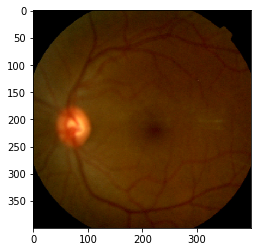

In [61]:
crop_img = cv2.resize(crop_img, (400,400))
plt.imshow(crop_img);
print("shape: ",crop_img.shape)

# CLAHE - Contrast-Limited Adaptive Histogram Equalization 

In [ ]:
"""

def morphological(img):
    """
    #This function returns images prepared for training
    """
    for _ in img:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        blur = cv2.GaussianBlur(src=img, ksize=(5,5), sigmaX=0)
        thres = cv2.threshold(blur,10 ,255, cv2.THRESH_BINARY)[1]
        contour = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0][0]
        contour = contour[:,0,:]

    return blablabla
    
"""